Projeto: Análise de atrito de funcionários RH IBM.
Descrição: Projeto de ciência de dados para prever a saída (attrition) de funcionários, 
utilizando o dataset IBM HR Analytics. O objetivo principal é apoiar a área de 
Recursos Humanos (RH) na implementação de estratégias de retenção proativas.

Autor: Ivan Luís Duarte

LinkedIn: https://www.linkedin.com/in/ivanluisduarte/

GitHub: https://github.com/ivanluisduarte

Data de Criação: 2025-10-23

Licença: MIT

# Análise exploratória dos dados

## Importações necessárias

In [1]:
# funções auxiliares
from src.auxiliares import (
    fnc_carregar_dados_kaggle,

    # describe personalizado para colunas numéricas
    fnc_describe_numericas_personalizado,
)
from src.config import DADOS_LIMPOS  # caminho para os dados limpos de saída
from src.graficos import (
    fnc_correlacao_formatada,  # gráfico de correlação formatada com heatmap
    plot_grafico_histograma_boxplot,  # gráfico combinado histograma + boxplot
)

# ferramentas padrão de ciência de dados
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Baixando os dados do Kaggle

Dados do [kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"). Veja o [dicionário de dados](../referencias/01_dicionario_de_dados.md "../referencias/01_dicionario_de_dados.md") para detalhes sobre a base e suas colunas.

In [2]:
df = fnc_carregar_dados_kaggle(
    kaggle_handle=r'pavansubhasht/ibm-hr-analytics-attrition-dataset',
    file_path=r'WA_Fn-UseC_-HR-Employee-Attrition.csv',
)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Conhecendo os dados originais do kaggle

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Percepções sobre o info()
- As colunas estão apresentadas em ordem alfabética;
- Não há colunas com informações vazias;
- Nenhuma colunas numéricas de ponto flutuante, o que pode indicar arredondamentos para algumas informações;

### Variáveis numéricas

In [4]:
fnc_describe_numericas_personalizado(df)

,tipo,percentual inteiros,nulo,count,nulo/count,soma,unicos,moda,mean,std,AMP,MAD,VAR,CV,qtd_3SZ<,qtd_LOWER,qtd_01%,3SZ<,LOWER,min,01%,25%,50%,75%,99%,max,UPPER,3SZ>,qtd_99%,qtd_UPPER,qtd_3SZ>,skewness,kurtosis,dist_normal,pvalue,teste normalidade
Age,int64,100,0,1470,0,54278,43,35,36.923809,9.135373,42,7.409796,83.455049,24.741146,0,0,8,9.517689,10.500000,18,19.000000,30.000000,36.000000,43.000000,58.310000,60,62.500000,64.329930,15,0,0,0.413286,-0.404145,False,0,Shapiro-Wilk
DailyRate,int64,100,0,1470,0,1179654,886,691,802.485718,403.509094,1397,350.253723,162819.593737,50.282402,0,0,13,-408.041595,-573.000000,102,117.000000,465.000000,802.000000,1157.000000,1485.000000,1499,2195.000000,2013.013014,13,0,0,-0.003519,-1.203823,False,0,Shapiro-Wilk
DistanceFromHome,int64,100,0,1470,0,13513,29,2,9.192517,8.106864,28,6.572743,65.721251,88.189819,0,0,0,-15.128077,-16.000000,1,1.000000,2.000000,7.000000,14.000000,29.000000,29,32.000000,33.513110,0,0,0,0.958118,-0.224833,False,0,Shapiro-Wilk
Education,int64,100,0,1470,0,4282,5,3,2.912925,1.024165,4,0.792710,1.048914,35.159328,0,0,0,-0.159570,-1.000000,1,1.000000,2.000000,3.000000,4.000000,5.000000,5,7.000000,5.985420,0,0,0,-0.289681,-0.559115,False,0,Shapiro-Wilk
EmployeeCount,int64,100,0,1470,0,1470,1,1,1.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0,1.000000,1.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,0,0,0,0.000000,0.000000,True,1,Shapiro-Wilk
EmployeeNumber,int64,100,0,1470,0,1506552,1470,1,1024.865356,602.024353,2067,522.405090,362433.299749,58.741802,0,0,15,-781.207703,-1105.500000,1,19.690001,491.250000,1020.500000,1555.750000,2046.620000,2068,3152.500000,2830.938311,15,0,0,0.016574,-1.223179,False,0,Shapiro-Wilk
EnvironmentSatisfaction,int64,100,0,1470,0,4001,4,3,2.721769,1.093082,3,0.947116,1.194829,40.160732,0,0,0,-0.557478,-1.000000,1,1.000000,2.000000,3.000000,4.000000,4.000000,4,7.000000,6.001015,0,0,0,-0.321654,-1.202520,False,0,Shapiro-Wilk
HourlyRate,int64,100,0,1470,0,96860,71,66,65.891159,20.329428,70,17.649248,413.285626,30.853045,0,0,0,4.902874,-5.625000,30,30.000000,48.000000,66.000000,83.750000,100.000000,100,137.375000,126.879439,0,0,0,-0.032311,-1.196398,False,0,Shapiro-Wilk
JobInvolvement,int64,100,0,1470,0,4013,4,3,2.729932,0.711561,3,0.567767,0.506319,26.065161,0,0,0,0.595249,0.500000,1,1.000000,2.000000,3.000000,3.000000,4.000000,4,4.500000,4.864615,0,0,0,-0.498419,0.270999,False,0,Shapiro-Wilk
JobLevel,int64,100,0,1470,0,3034,5,1,2.063946,1.106940,4,0.832475,1.225316,53.632225,0,0,0,-1.256874,-2.000000,1,1.000000,1.000000,2.000000,3.000000,5.000000,5,6.000000,5.384765,0,0,0,1.025401,0.399152,False,0,Shapiro-Wilk


##### Percepções sobre o quadro acima:
- Confirma que não existem nulos e todas as numéricas são interias;
- As colunas `EmployeeCount` e `StandardHours` são de valor único e são inúteis para qualquer análise;
- A coluna `EmployeeNumber` é única para cada registro, podendo ser usada como chave ou índice;
- Nenhuma coluna tem mínimo negativo, então são números naturais;
- Os máximos não passam de dezenas de milhares, dispensando o uso dos 64 bits;
- Algumas das informações de baixa amplitude, sabemos que são na verdade categóricas;
- Temos indícios de alguns Outliers, apesar de não termos uma distribuição normal;

### Variáveis textuais

In [5]:
df.describe(exclude='number').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


##### Percepções sobre o quadro acima:
- Confirma que não existem nulos;
- A coluna `Over18` é de valor único e é inúteis para qualquer análise;
- Os poucos valores únicos confirmam que se tratam de categorias;
- Nosso nossa coluna target `Attrition` tem desbalanceamento acentuado;

## Otimizando o dataframe

In [6]:
# fazendo backup para não precisar rodar tudo que está acima novamente
# df_backup = df.copy()

In [7]:
# se quiser voltar ao backup
# df = df_backup.copy()


# Eliminando colunas com valor único
colunas_unitarias = df.nunique()[df.nunique() <= 1].index.tolist()
if len(colunas_unitarias) > 0:
    df.drop(columns=colunas_unitarias, inplace=True)
print('Colunas unitárias eliminadas:\n', colunas_unitarias, '\n')


# colunas categoricas
colunas_categoricas = df.select_dtypes(exclude='number').columns.tolist()
print('Colunas categoricas\n', colunas_categoricas, '\n')


# transformando texto em categorias
for coluna in colunas_categoricas:
    df[coluna] = pd.Categorical(df[coluna])


# Colunas Numericas
colunas_numericas = df.select_dtypes(include='number').columns.tolist()
print('Colunas numéricas:\n', colunas_numericas, '\n')


# reduzindo o tamanho das variáveis numericas
for coluna in colunas_numericas:
    # todas as inteiras de conteúdo natural são transformadas para o menor natural possível
    df[coluna] = pd.to_numeric(df[coluna], downcast='unsigned')


# transformando a EmployeeNumber em indice para o dataframe depois de otimizada
df.set_index(keys=['EmployeeNumber'], inplace=True)
df.index.name = None


del (colunas_unitarias, colunas_categoricas, colunas_numericas)


df.info()

Colunas unitárias eliminadas:
 ['EmployeeCount', 'Over18', 'StandardHours'] 

Colunas categoricas
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 

Colunas numéricas:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   uint8   
 1   Attrition                 

##### Percepções sobre o info()
- Eliminamos corretamente as colunas de valores únicos;
- Reduzimos o tamanho do dataframe em memória utilizada sem perder informação, apesar de já ser uma base de dados pequena;

### Traduzindo variáveis categóricas que estão como numéricas
Sabemos pelo [kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset") e pelo [dicionário de dados](../referencias/01_dicionario_de_dados.md "../referencias/01_dicionario_de_dados.md") que algumas numéricas de pouca amplitude são na verdade categorias ordenadas;

In [8]:
# fazendo backup para não precisar rodar tudo que está acima novamente
# df_backup = df.copy()

In [9]:
# se quiser voltar ao backup
# df = df_backup.copy()


# Education
dct_education = {1: 'Below College', 2: 'College',
                 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df['Education'] = df['Education'].map(dct_education)
df['Education'] = pd.Categorical(
    values=df['Education'],
    categories=dct_education.values(),
    ordered=True,
)

# PerformanceRating
dct_performance_rating = {1: 'Low', 2: 'Good',
                          3: 'Excellent', 4: 'Outstanding'}
df['PerformanceRating'] = df['PerformanceRating'].map(dct_performance_rating)
df['PerformanceRating'] = pd.Categorical(
    values=df['PerformanceRating'],
    categories=dct_performance_rating.values(),
    ordered=True,
)


# WorkLifeBalance
dct_work_life_balance = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(dct_work_life_balance)
df['WorkLifeBalance'] = pd.Categorical(
    values=df['WorkLifeBalance'],
    categories=dct_work_life_balance.values(),
    ordered=True,
)


# Niveis comuns entre variáveis
dct_niveis_compartilhados = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
for coluna in ('EnvironmentSatisfaction', 'JobInvolvement',
               'JobSatisfaction', 'RelationshipSatisfaction'):
    df[coluna] = df[coluna].map(dct_niveis_compartilhados)
    df[coluna] = pd.Categorical(
        values=df[coluna],
        categories=dct_niveis_compartilhados.values(),
        ordered=True,
    )


# niveis sem nomeacao
for coluna in ('JobLevel', 'StockOptionLevel'):
    # convertendo para string primeiro para evitar problemas de mapeamento
    df[coluna] = df[coluna].astype(str)
    df[coluna] = pd.Categorical(values=df[coluna], ordered=True)


# os dicionários tradutores não serão mais necessários
del (dct_education, dct_performance_rating,
     dct_work_life_balance, dct_niveis_compartilhados)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   uint8   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   uint16  
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   uint8   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   uint8   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobRole                   1470 non-null   category
 1

As variáveis numéricas foram transformadas para categóricas com seu significado correspondente.

In [10]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


## Analisando o conteúdo das variáveis categóricas

In [11]:
# Atualizando as listas de colunas
coluna_alvo = 'Attrition'  # coluna target
colunas_numericas = df.select_dtypes(include='number').columns.tolist()
colunas_categoricas = df.select_dtypes(exclude='number').columns.tolist()
colunas_categoricas.remove(coluna_alvo)

print(
    'Colunas categóricas:\n', colunas_categoricas,
    '\n\nColunas numéricas:\n', colunas_numericas,
)

Colunas categóricas:
 ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'] 

Colunas numéricas:
 ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


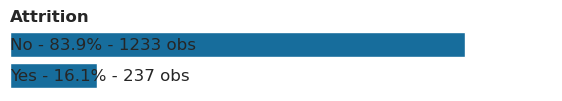

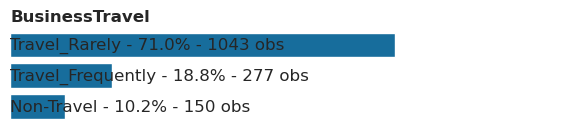

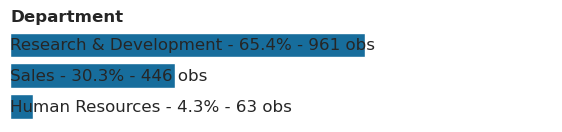

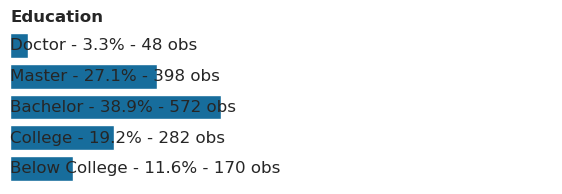

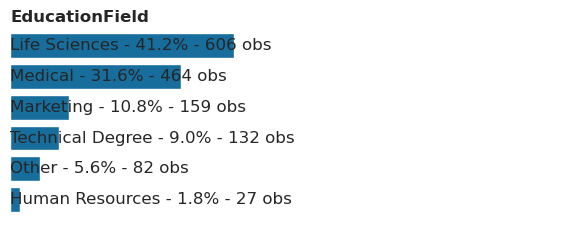

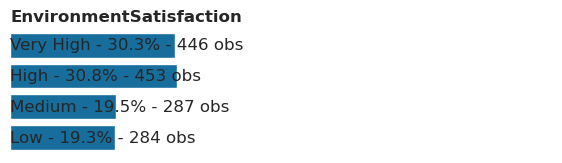

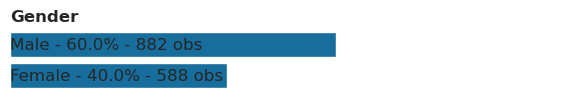

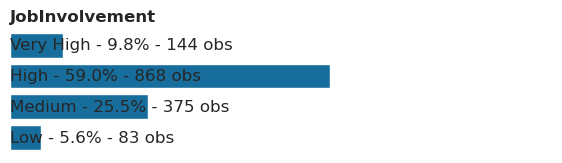

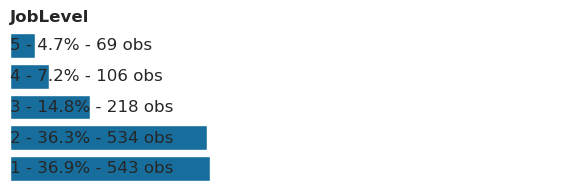

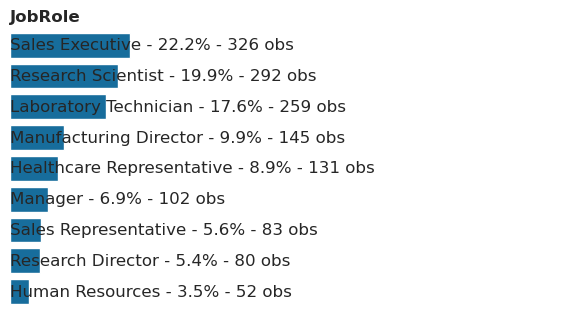

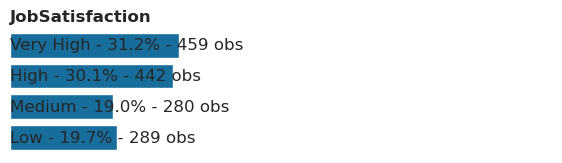

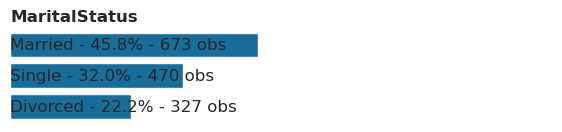

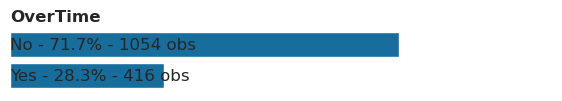

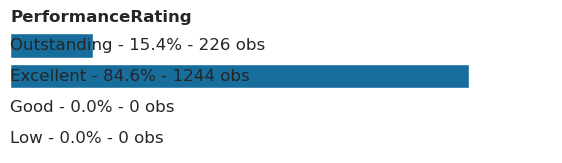

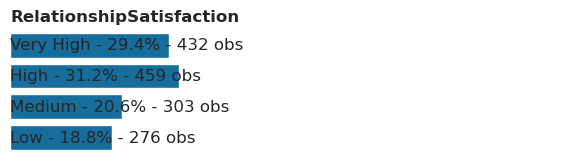

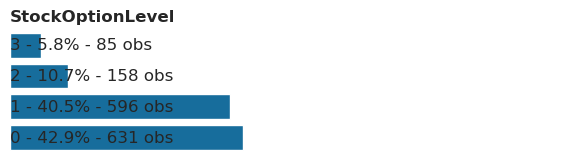

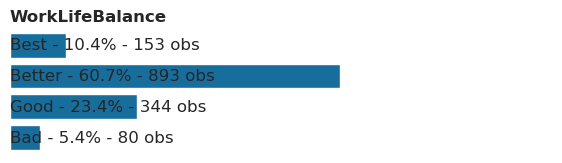

In [12]:
# Loop através de cada coluna na lista de colunas categoricas


for coluna in [coluna_alvo] + colunas_categoricas:
    # Calcula as quantidades e proporções de cada valor único na coluna
    if df[coluna].cat.ordered:  # mantém a ordem das categorias
        quantidades = df[coluna].value_counts(sort=False)
    else:  # ordena do maior para o menor valor no gráfico
        quantidades = df[coluna].value_counts(sort=True, ascending=True)

    rotulos = quantidades.index
    proporcoes = quantidades / quantidades.sum() * 100.0

    # Exibe o gráfico de barras horizontal
    plt.figure(figsize=(7, len(rotulos) * 0.4))
    sns.barplot(x=proporcoes, y=rotulos, order=rotulos[::-1])

    plt.title(label=f'{coluna}', weight='bold', loc='left')

    plt.xlabel(xlabel=None)
    plt.ylabel(ylabel=None)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.xlim(0, 100)
    plt.box(False)

    # Adiciona os rótulos dentro das barras
    for rotulo, proporcao in zip(rotulos, proporcoes):
        plt.text(x=0, y=rotulo,
                 s=f'{rotulo} - {proporcao:.1f}% - {quantidades[rotulo]} obs',
                 va='center', ha='left',
                 fontdict={'weight': 'normal'},
                 )

    plt.show()

##### Percepções sobre as variáveis categórias:
- `Attrition`, que é nossa variável target, só tem 16% de atrito, evidenciando o desbalanceamento;
- As variáveis `BusinessTravel`, `Department`, `Overtime` e `PerformanceRating` também tem um desbalanceamento acentuado;
- `PerformanceRating` não tem registros para duas classes (Low e Good);
- A maioria tem pouca ou nenhuma opção de ações;


### Combinando `Department` e `JobRole`

In [13]:
pd.crosstab(df['JobRole'], df['Department'])

Department,Human Resources,Research & Development,Sales
JobRole,,,
Healthcare Representative,0,131,0
Human Resources,52,0,0
Laboratory Technician,0,259,0
Manager,11,54,37
Manufacturing Director,0,145,0
Research Director,0,80,0
Research Scientist,0,292,0
Sales Executive,0,0,326
Sales Representative,0,0,83


##### Engenharia de atributos
Podemos combinar essas duas colunas.


In [14]:
df['Department-JobRole'] = \
    df['Department'].astype(str) + ' - ' + df['JobRole'].astype(str)

df['Department-JobRole'] = pd.Categorical(df['Department-JobRole'])

df['Department-JobRole'].value_counts(normalize=True).to_frame()

,proportion
Department-JobRole,
Sales - Sales Executive,0.221769
Research & Development - Research Scientist,0.198639
Research & Development - Laboratory Technician,0.176190
Research & Development - Manufacturing Director,0.098639
Research & Development - Healthcare Representative,0.089116
Sales - Sales Representative,0.056463
Research & Development - Research Director,0.054422
Research & Development - Manager,0.036735
Human Resources - Human Resources,0.035374


Eliminando as colunas individuais

In [15]:
df = df[[
    coluna for coluna in sorted(df.columns)  # ordenadas alfabeticamente
    if coluna not in ('Department', 'JobRole')  # sem essas colunas
]]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   uint8   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   uint16  
 4   Department-JobRole        1470 non-null   category
 5   DistanceFromHome          1470 non-null   uint8   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   uint8   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobSatisfaction           1470 non-null   category
 1

## Analisando o conteúdo das variáveis numéricas

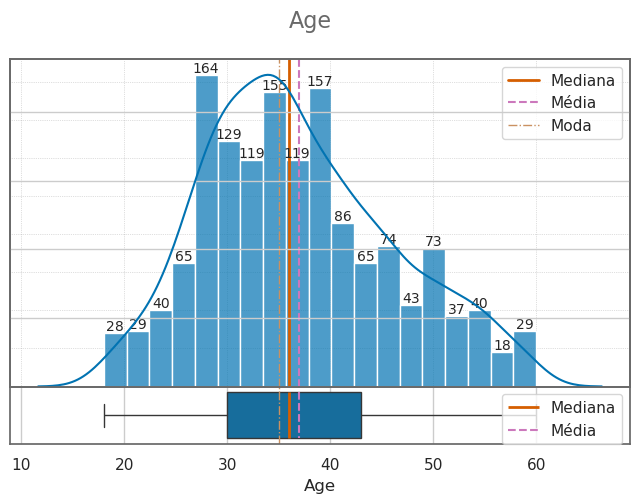

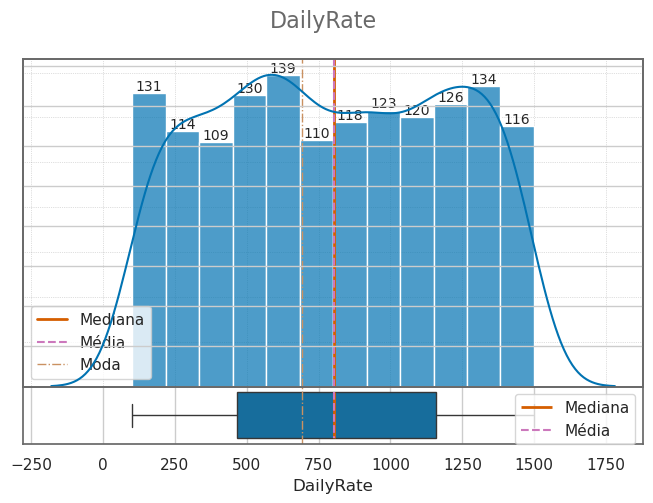

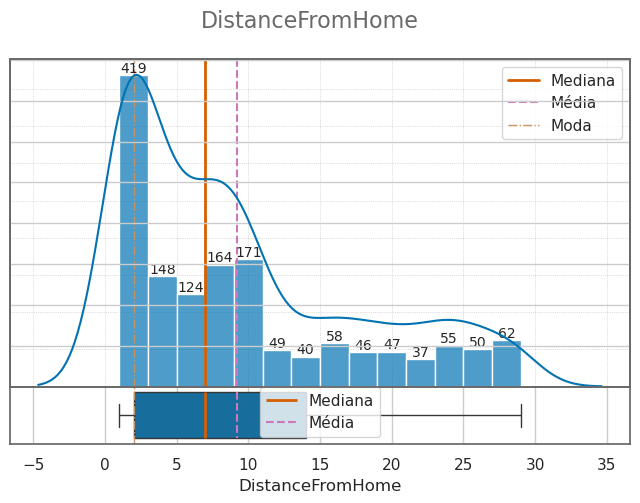

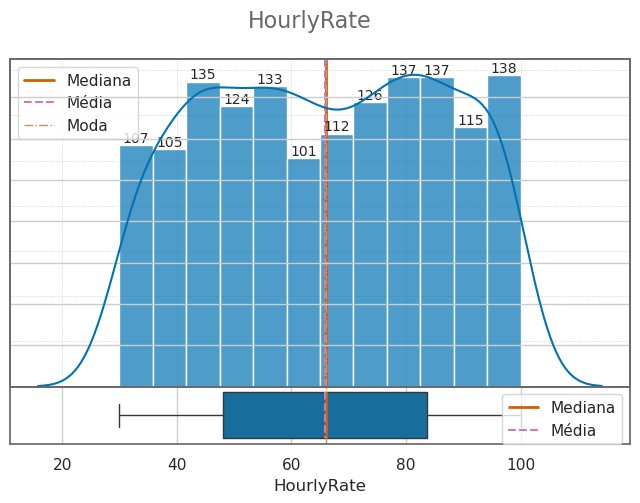

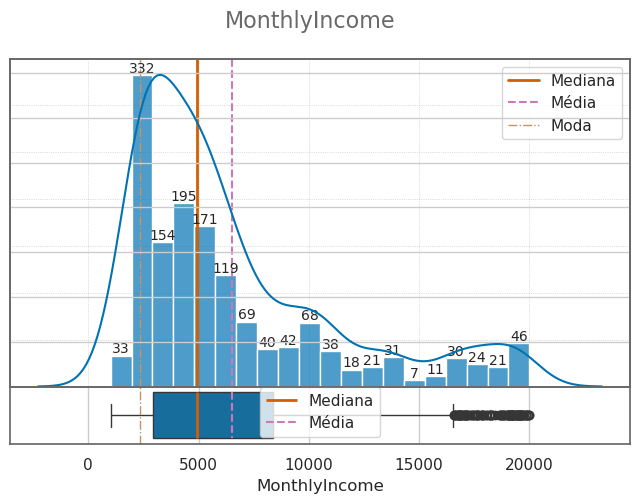

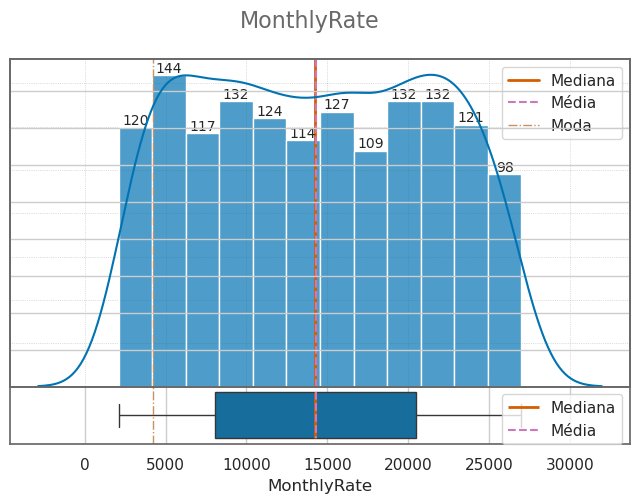

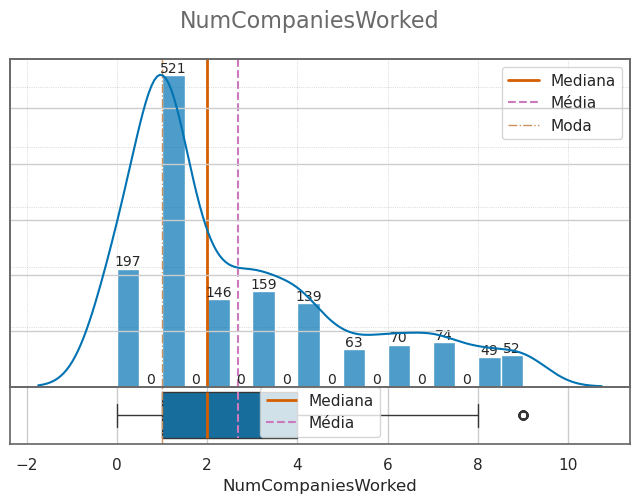

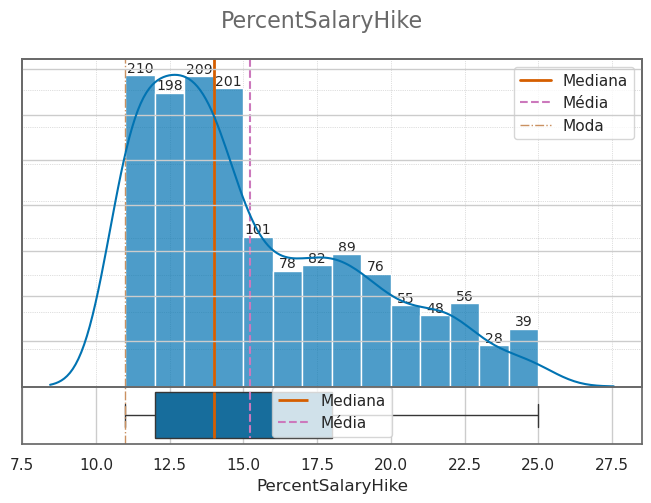

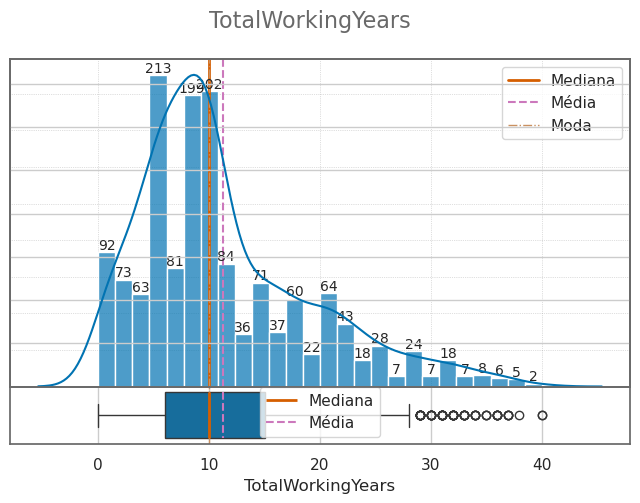

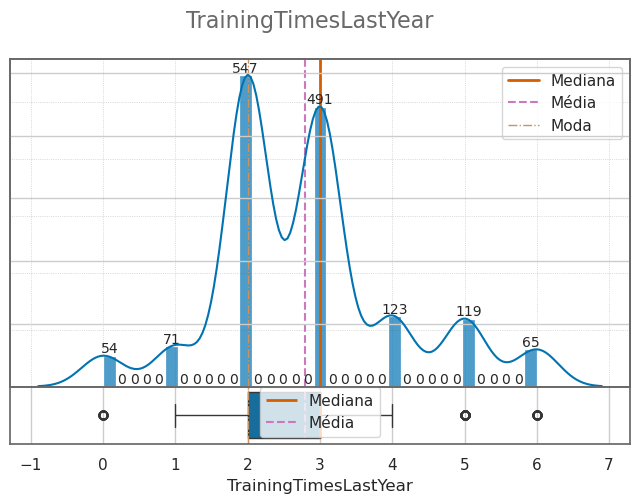

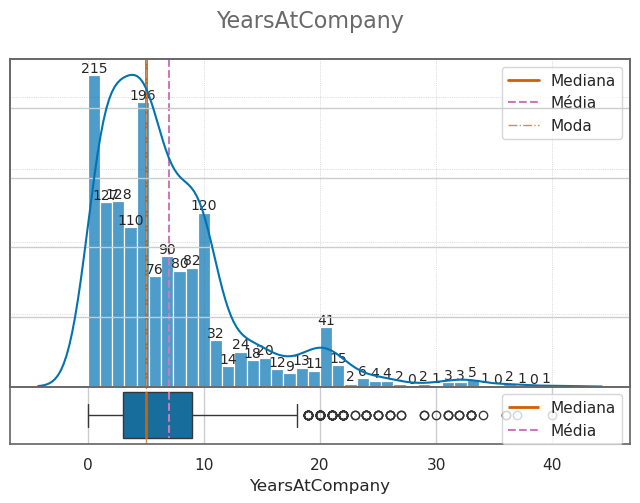

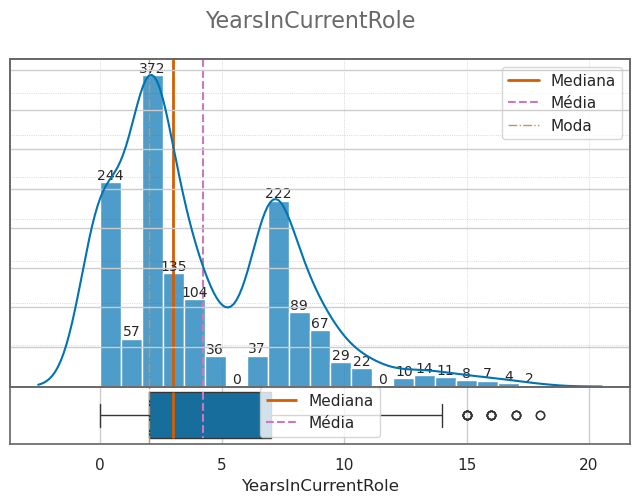

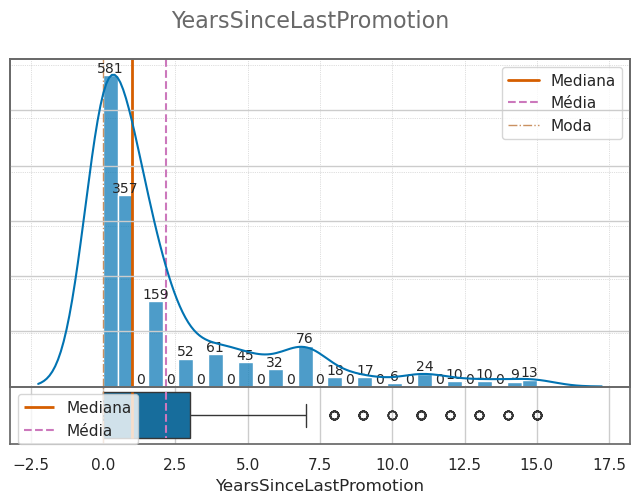

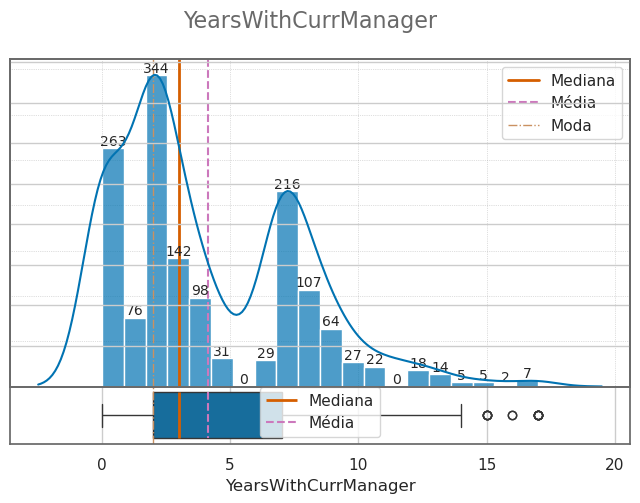

In [16]:
for coluna in colunas_numericas:
    plot_grafico_histograma_boxplot(
        dataframe=df,
        coluna=coluna,
        flg_mostrar_moda=True,
        titulo=coluna,
    )

##### Percepções sobre as variáveis numéricas:
- Idade é bem distribuída, com média e medianas próximas;
- A maior parte dos funcionários moram perto da empresa;
- A maioria dos funcionários tiveram poucos empregos;
- A maioria tem menos tempo de trabalho em geral, na empresa, ou com o mesmo gerente;
- A maioria teve aumentos percentuais pequenos de salário;
- A empresa deu treinamentos para a maior parte dos seus funcionários;
- A maioria dos funcionários receberam promoção nos últimos anos;

In [17]:
len(colunas_numericas)

14

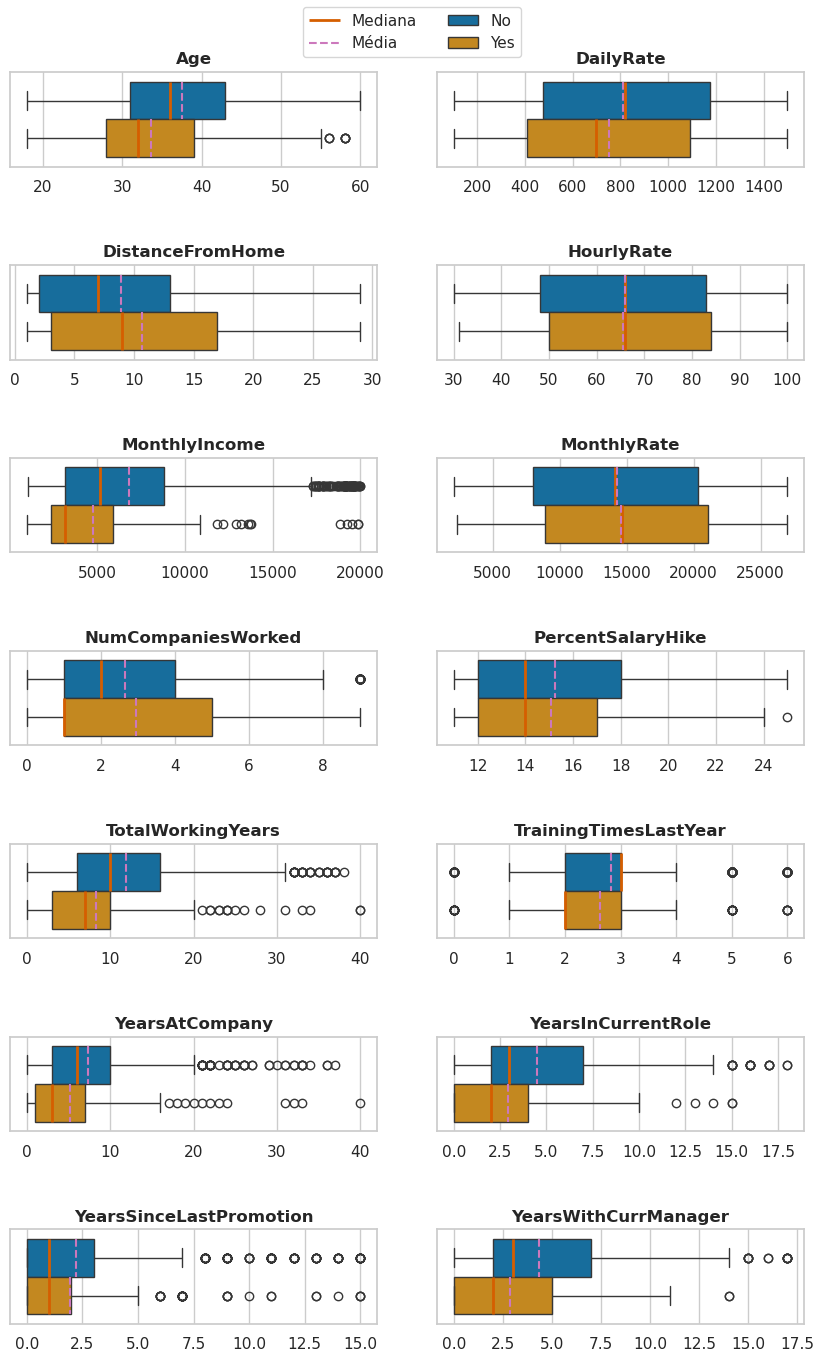

In [18]:
fig, axs = plt.subplots(7, 2, figsize=(9, 14))

handles = None
labels = None

for i, (ax, coluna) in enumerate(zip(axs.flatten(), colunas_numericas)):
    sns.boxplot(
        data=df,
        x=coluna,
        hue=coluna_alvo,
        ax=ax,
        showmeans=True,
        meanline=True,
        medianprops={'label': 'Mediana', 'color': 'C3',
                     'linewidth': 2.0, 'linestyle': '-'},
        meanprops={'label': 'Média', 'color': 'C4',
                   'linewidth': 1.5, 'linestyle': '--'},
    )
    ax.set_title(coluna, weight='bold')
    ax.set_xlabel(None)

    # Coleta handles e labels apenas da primeira subtrama
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

    # Remove a legenda de todas as subtramas
    if ax.get_legend() is not None:
        ax.legend().remove()


# Adiciona a legenda única à figura, no topo central
# ncol=3 para distribuir melhor (ajuste se necessário)
fig.legend(handles[2:6], labels[2:6], loc='upper center', ncol=2, frameon=True)

plt.tight_layout(pad=3)
plt.show()

##### Percepções sobre as variáveis numéricas e o target:
À primeira vista, não há muita diferença significativa entre as funcionários que tiveram atrito dos que não tiveram.
Devemos claro, considerar que há um desbalanceamento acentuado na informação de atrito.
Ainda assim, na média, podemos perceber leves diferenças que precisam ser confirmadas posteriormente numa modelagem.
- Jovem tem maior chance se ter atrito;
- Quem mora mais longe da empresa tem maior chance se ter atrito;
- Menor cargo tem maior chance se ter atrito;
- Menor salário tem maior chance se ter atrito;
- Menor opção de ação tem maior chance se ter atrito;
- Menor tempo de trabalho, tem de companhia e de cargo atual tem maior chance se ter atrito;

### Análise de correlação

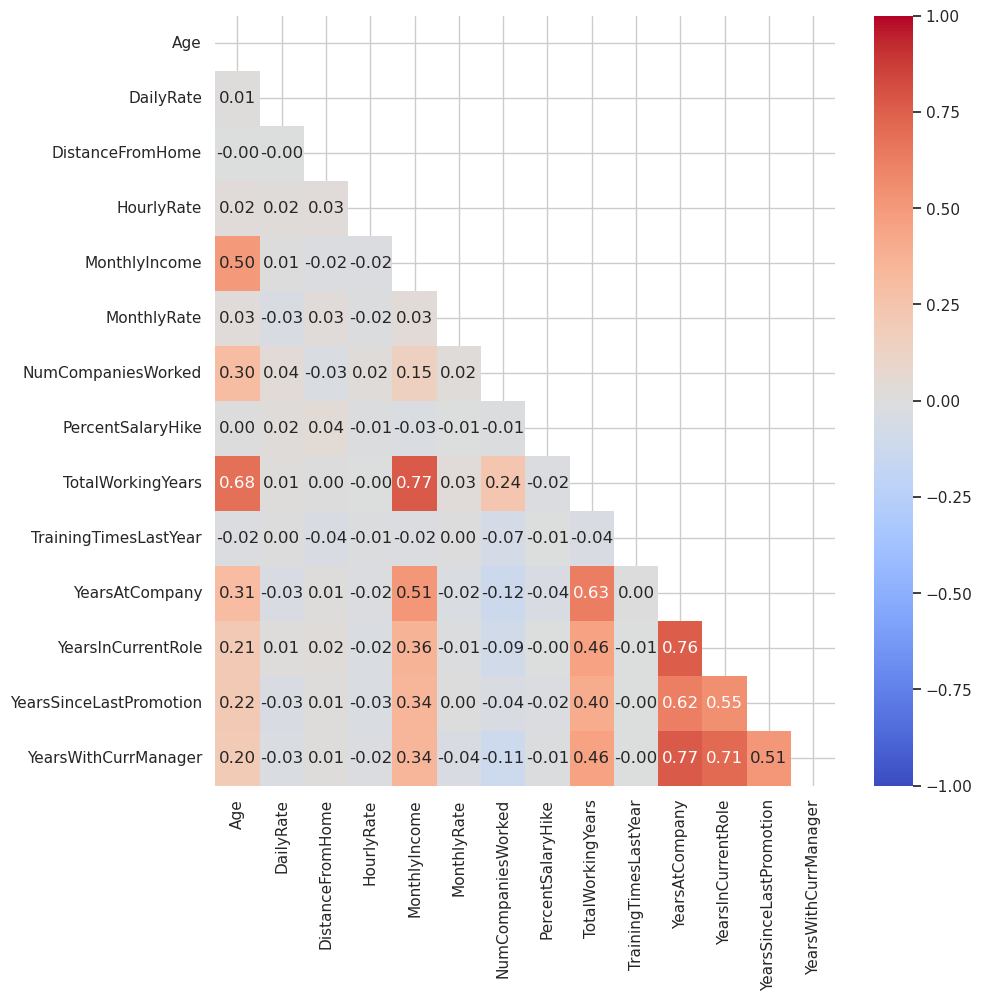

In [19]:
fnc_correlacao_formatada(df)

Em geral as correlações são baixa, com exceção para as variáveis de tempo e salário.
Posteriormente podemos encontrar correlação com o target.

## Salvando a base limpa

In [20]:
df.to_parquet(path=DADOS_LIMPOS, index=True)